## Import Libraries ##

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

## Check Working Directory ##

In [289]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\Cohort Analysis\Notebook


In [290]:
print(os.listdir())

['.ipynb_checkpoints', 'Cohort Analysis.ipynb']


## Load Dataset ##

In [291]:
df = pd.read_csv("../Data/Dataset_ecommerce.csv")
df.head(4)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa


In [292]:
df.tail(4)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia


## Understanding Dataset Information ##

In [293]:
df.shape

(541909, 8)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [295]:
df.nunique()

InvoiceNo      25900
InvoiceDate    23260
CustomerID      4372
StockCode       9000
Description       10
Quantity         100
UnitPrice       9901
Country           28
dtype: int64

In [296]:
df.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [297]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [298]:
corr = (df.corr())
corr

,CustomerID,Quantity,UnitPrice
CustomerID,1.000000,0.004604,0.000230
Quantity,0.004604,1.000000,0.001778
UnitPrice,0.000230,0.001778,1.000000


#### Create Correlation Map For Numerical Values ####

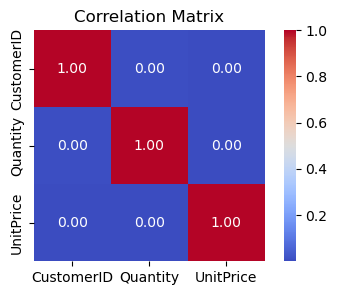

In [299]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning ##

In [300]:
# Checking missing values in the dataset

df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [301]:
# Drop missing columm
df.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [302]:
df.head(4)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa


In [303]:
# Checking missing values in the dataset

df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [304]:
data_type = df['InvoiceDate'].dtype
print(data_type)

object


In [305]:
# change to datatime 

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head(4)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa


In [306]:
# df['InvoiceDate'] has been changed to datetime  

data_type = df['InvoiceDate'].dtype
print(data_type)

datetime64[ns]


## Exploratory Data Analysis ##

#### Analysis By Country ####

In [307]:
quantities_sold_per_country = df.groupby(["Country"])["Quantity"].sum().reset_index()
quantities_sold_per_country = quantities_sold_per_country.sort_values("Quantity", ascending = False).reset_index(drop = True)
quantities_sold_per_country.head(4)

,Country,Quantity
0,Togo,741223
1,South Africa,740589
2,Cote d'Ivoire,740229
3,Nigeria,739708


#### Visualizing the top 15 countries ####

In [308]:
# Extract the top 10 countries with the highest quantity sold
top_15_countries = quantities_sold_per_country.head(15)

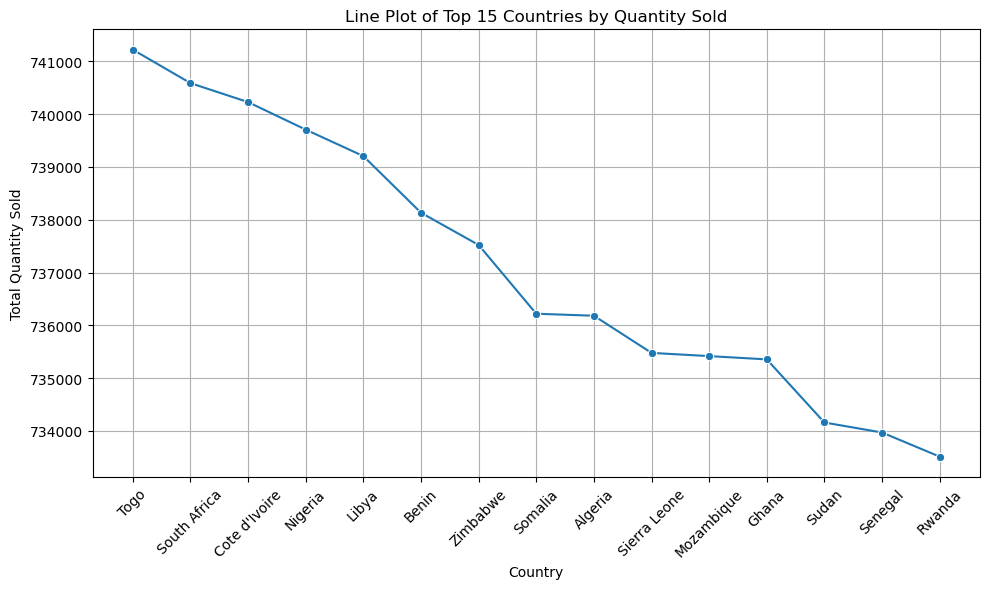

In [309]:
# line plot

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_15_countries, x='Country', y='Quantity', marker='o')
plt.title('Line Plot of Top 15 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

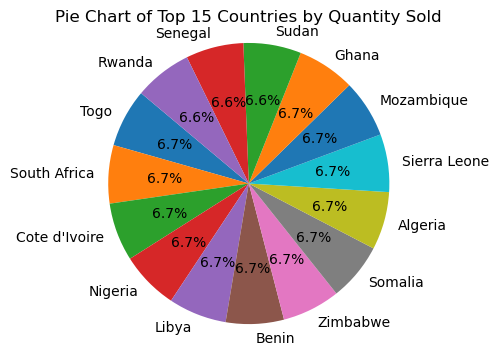

In [310]:
plt.figure(figsize=(4, 4))
plt.pie(top_15_countries['Quantity'], labels=top_15_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 15 Countries by Quantity Sold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#### Visualizing The Least 15 countries ####

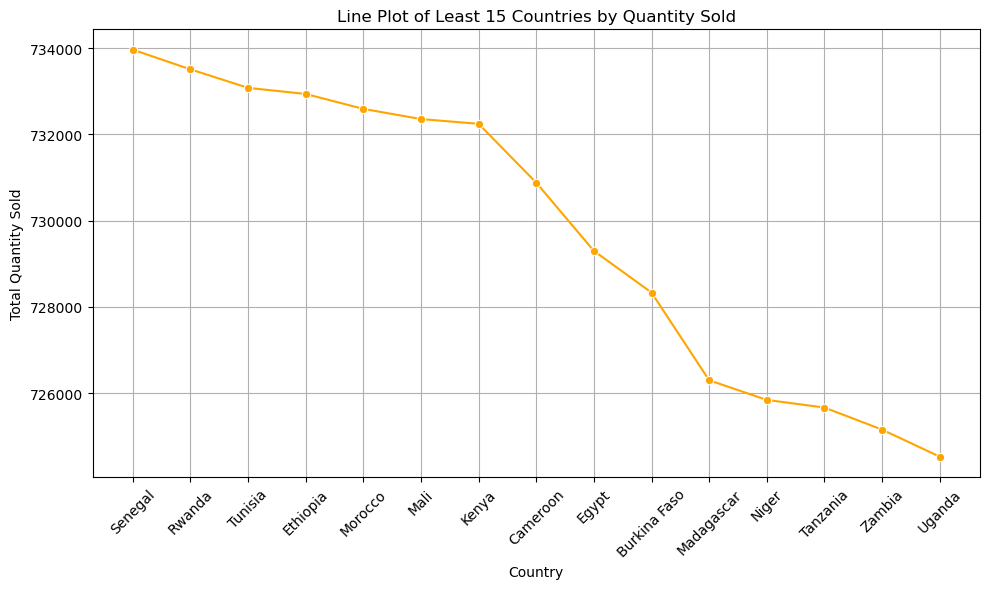

In [311]:
# Extract the least 15 countries with the lowest quantity sold
least_15_countries = quantities_sold_per_country.tail(15)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=least_15_countries, x='Country', y='Quantity', marker='o', color='orange')
plt.title('Line Plot of Least 15 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

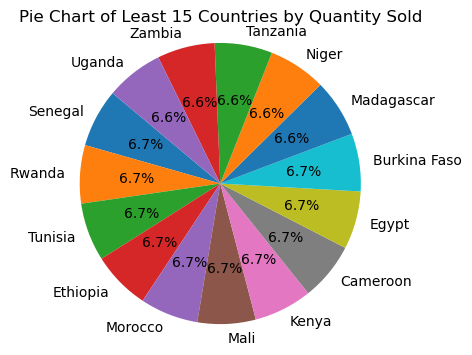

In [312]:
# Pie chart

plt.figure(figsize=(4, 4))
plt.pie(least_15_countries['Quantity'], labels=least_15_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Least 15 Countries by Quantity Sold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

#### Analysis of countries and number of customers ####

In [313]:
country_to_customers = df.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index(drop = True)
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [314]:
country_to_customers.head(4)

,Country,Number of customers
0,Mozambique,3072
1,Benin,3054
2,Togo,3053
3,Nigeria,3051


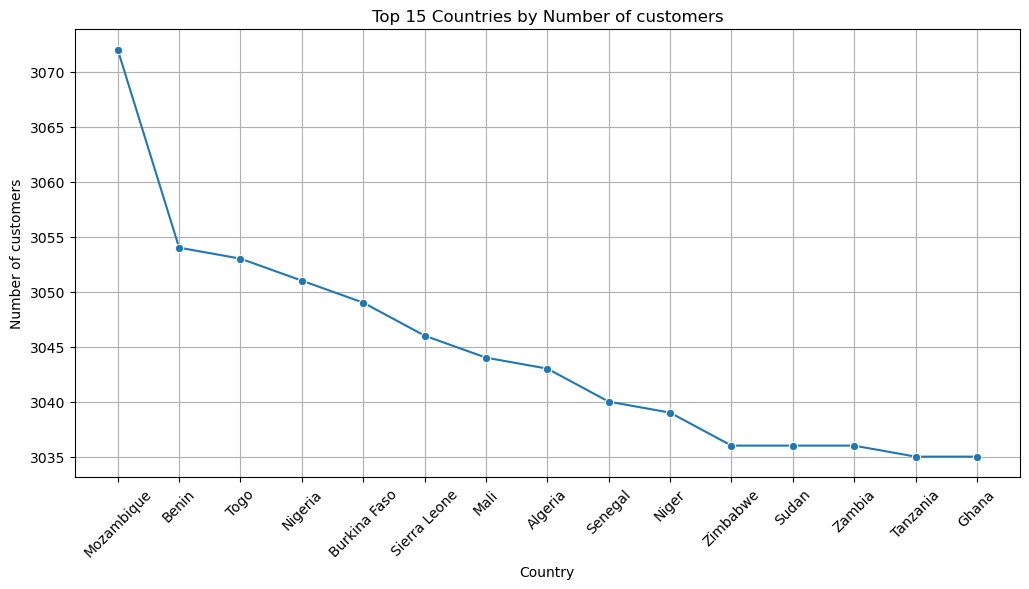

In [315]:
# Extract the Top 15 countries
top_15_countries = country_to_customers.head(15)

# Create a figure for visualization
plt.figure(figsize=(20, 6))

# Line plot for Top 15 Countries
plt.subplot(1, 2, 1)
sns.lineplot(data=top_15_countries, x='Country', y='Number of customers', marker='o')
plt.title('Top 15 Countries by Number of customers')
plt.xlabel('Country')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

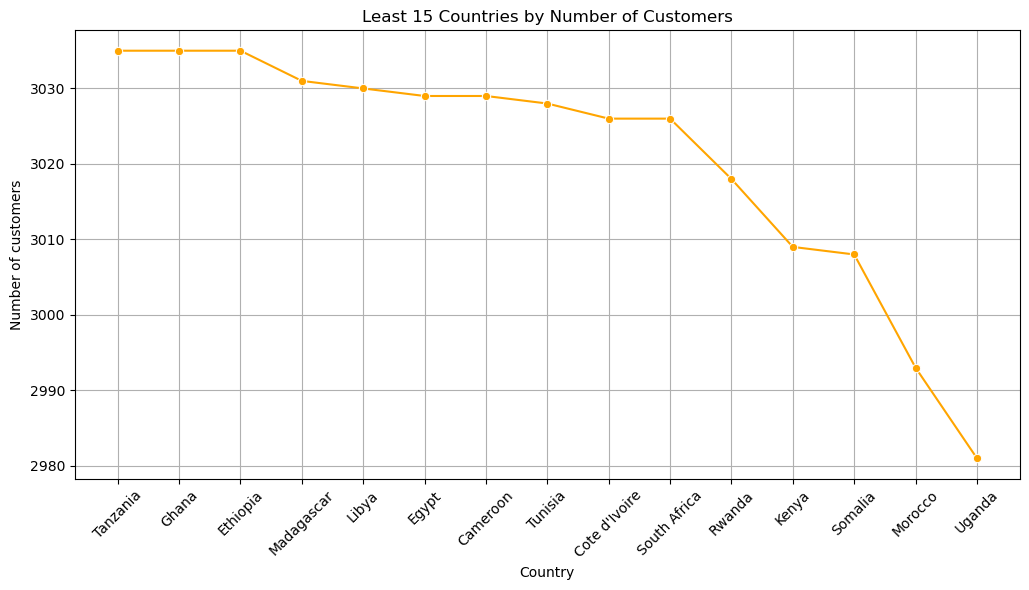

In [316]:
# Extract the Least 15 countries
least_15_countries = country_to_customers.tail(15)

# Create a figure for visualization
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
sns.lineplot(data=least_15_countries, x='Country', y='Number of customers', marker='o', color='orange')
plt.title('Least 15 Countries by Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Analyzing The Sales Trend ##

In [319]:
# Group the data by month and calculate the total monthly sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64